# Sudoku Model Training and Evaluation

This notebook demonstrates how to train, evaluate, and use the Sudoku digit recognition and cell type classification models.

In [3]:
# Import necessary packages
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Check for Apple Silicon and configure TensorFlow accordingly
import platform
if platform.processor() == 'arm':
    print("Running on Apple Silicon - enabling Metal acceleration")
    physical_devices = tf.config.list_physical_devices('GPU')
    if physical_devices:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("Metal acceleration enabled")
    else:
        print("No Metal GPU found")

# Add the src directory to the path so we can import our modules
sys.path.append('..')

# Import our modules
from src.data_processor import SudokuDataset, SudokuDataProcessor
from src.model_builder import SudokuModels, ModelEvaluator, SudokuExperiment
from src.utils import setup_project_paths, visualize_predictions

Running on Apple Silicon - enabling Metal acceleration
Metal acceleration enabled


In [2]:
# Setup paths
paths = setup_project_paths()
print("Project paths:")
for key, path in paths.items():
    print(f"- {key}: {path}")

Project paths:
- project_root: /Users/matt/development/sudoku-ai
- data_dir: /Users/matt/development/sudoku-ai/data
- models_dir: /Users/matt/development/sudoku-ai/models
- notebooks_dir: /Users/matt/development/sudoku-ai/notebooks


## Load Dataset and Extract Cells

First, we'll load a dataset and extract the cells for training.

In [4]:
# Set up the experiment (this handles the full pipeline)
experiment = SudokuExperiment()

# Check if we have a dataset available
dataset_name = '330_sudoku_dataset'  # Change to your dataset name
if os.path.exists(os.path.join(paths['data_dir'], f'{dataset_name}.zip')):
    # Load the dataset
    success = experiment.setup_dataset(dataset_name)
    if not success:
        print("Dataset loading failed. Generating a new one...")
        from src.generator import generate_sample_dataset
        generator, samples = generate_sample_dataset(num_samples=100)  # More samples for training
        dataset_name = os.path.basename(generator.output_dir)
        success = experiment.setup_dataset(dataset_name)
else:
    # Generate a dataset if we don't have one
    print("Dataset not found. Generating a new one...")
    from src.generator import generate_sample_dataset
    generator, samples = generate_sample_dataset(num_samples=100)  # More samples for training
    dataset_name = os.path.basename(generator.output_dir)
    success = experiment.setup_dataset(dataset_name)

Dataset already extracted at /Users/matt/development/sudoku-ai/data/extracted/330_sudoku_dataset
Dataset size: 330


In [24]:
# Load samples from the dataset
samples = experiment.load_samples(max_samples=None, difficulties=['easy', 'medium', 'hard'])  # Load all available samples
print(f"Loaded {len(samples)} samples")

Loading samples: 100%|██████████| 330/330 [00:03<00:00, 103.22it/s]

Loaded 330 samples
Loaded 330 samples


100%|██████████| 330/330 [00:00<00:00, 444.65it/s]


Processed 26730 cells
Digit distribution: [10905  1756  1724  1741  1761  1779  1730  1757  1778  1799]
Cell type distribution: [10905 10228  5597]
Dataset shapes:
Train: (18711, 28, 28, 1), Validation: (2673, 28, 28, 1), Test: (5346, 28, 28, 1)


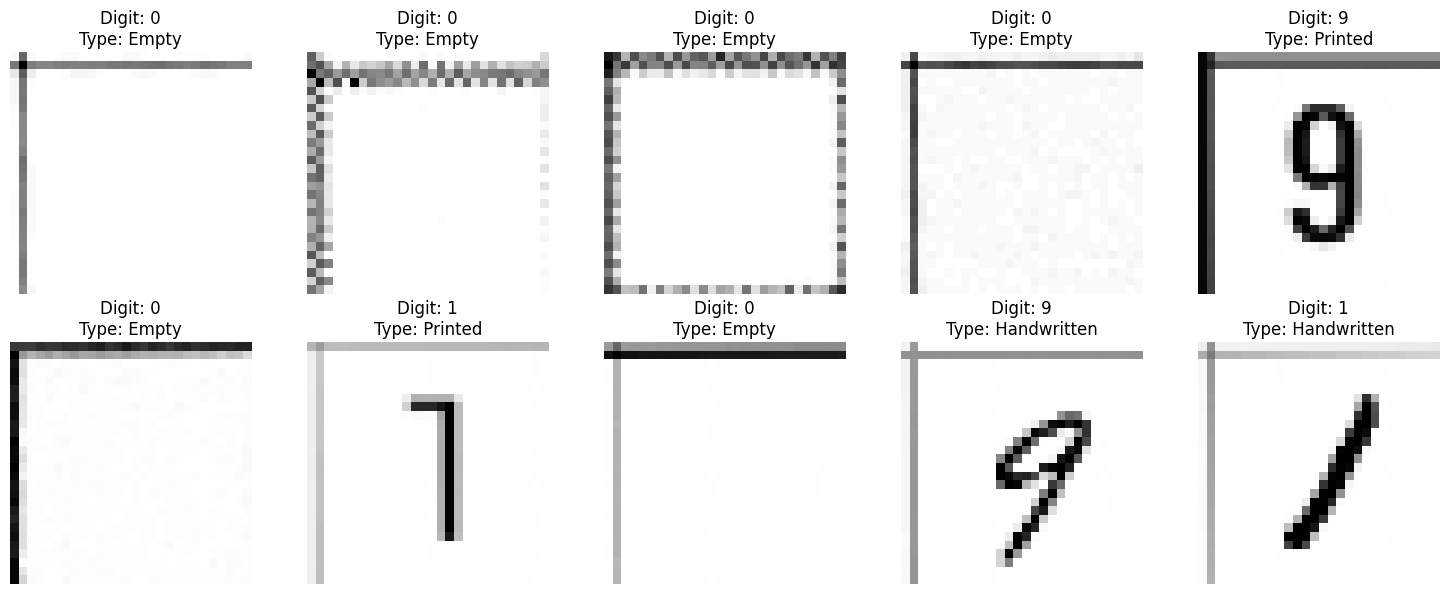

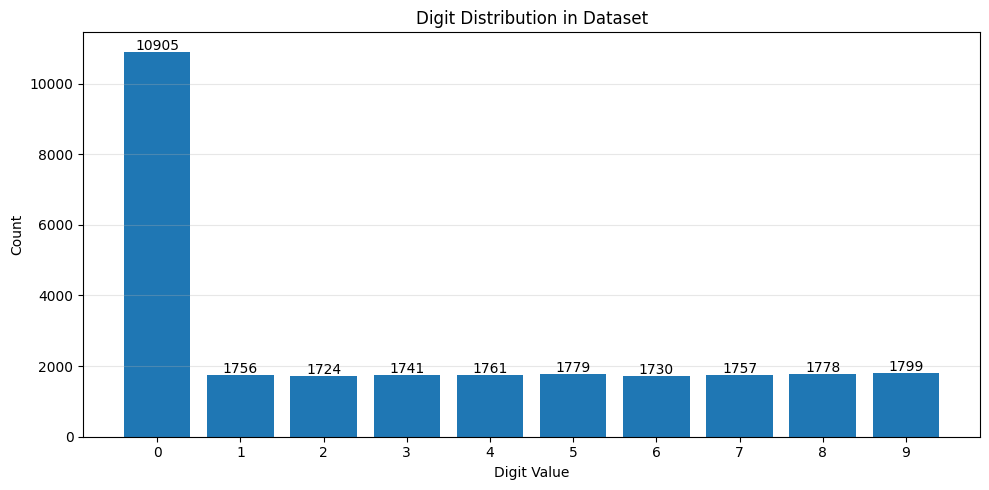

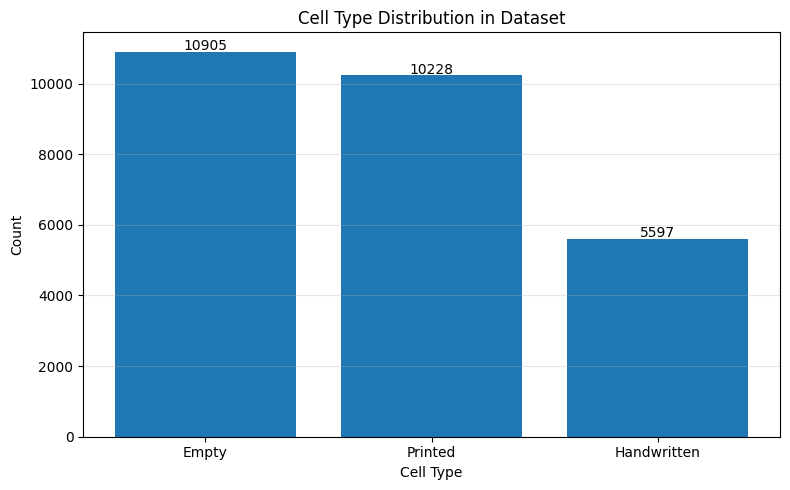

In [25]:
# Extract cells and prepare training data
datasets = experiment.prepare_data()

# Visualize the dataset
experiment.visualize_data()

## Train Models

Now let's train both digit recognition and cell type classification models.

In [7]:
# Build models
model_builder = experiment.build_models()

In [8]:
# Train digit recognition models
digit_models = experiment.train_digit_models(epochs=10)

2025-05-14 13:23:50.355735: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-05-14 13:23:50.355762: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-14 13:23:50.355768: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-14 13:23:50.355850: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-14 13:23:50.355902: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2025-05-14 13:23:51.041866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


585/585 [==============================] - ETA: 0s - loss: 1.2285 - accuracy: 0.6359

2025-05-14 13:23:57.196342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


585/585 [==============================] - 7s 8ms/step - loss: 1.2285 - accuracy: 0.6359 - val_loss: 0.4155 - val_accuracy: 0.8537 - lr: 0.0010
Epoch 2/10
585/585 [==============================] - 4s 7ms/step - loss: 0.5142 - accuracy: 0.8399 - val_loss: 0.2196 - val_accuracy: 0.9465 - lr: 0.0010
Epoch 3/10
585/585 [==============================] - 4s 7ms/step - loss: 0.3908 - accuracy: 0.8824 - val_loss: 0.1573 - val_accuracy: 0.9615 - lr: 0.0010
Epoch 4/10
585/585 [==============================] - 4s 7ms/step - loss: 0.3493 - accuracy: 0.9025 - val_loss: 0.1410 - val_accuracy: 0.9682 - lr: 0.0010
Epoch 5/10
585/585 [==============================] - 4s 7ms/step - loss: 0.2969 - accuracy: 0.9207 - val_loss: 0.1452 - val_accuracy: 0.9682 - lr: 0.0010
Epoch 6/10
585/585 [==============================] - 4s 7ms/step - loss: 0.2743 - accuracy: 0.9260 - val_loss: 0.1191 - val_accuracy: 0.9731 - lr: 0.0010
Epoch 7/10
585/585 [==============================] - 4s 7ms/step - loss: 0.2682 

2025-05-14 13:24:37.099427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


168/168 [==============================] - 0s 1ms/step


Epoch 1/10


2025-05-14 13:24:37.751133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


585/585 [==============================] - ETA: 0s - loss: 0.3904 - accuracy: 0.8857

2025-05-14 13:24:47.919650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


585/585 [==============================] - 11s 15ms/step - loss: 0.3904 - accuracy: 0.8857 - val_loss: 0.2506 - val_accuracy: 0.9218 - lr: 0.0010
Epoch 2/10
585/585 [==============================] - 8s 14ms/step - loss: 0.1101 - accuracy: 0.9711 - val_loss: 0.1333 - val_accuracy: 0.9603 - lr: 0.0010
Epoch 3/10
585/585 [==============================] - 8s 14ms/step - loss: 0.0840 - accuracy: 0.9777 - val_loss: 0.0678 - val_accuracy: 0.9794 - lr: 0.0010
Epoch 4/10
585/585 [==============================] - 8s 13ms/step - loss: 0.0739 - accuracy: 0.9809 - val_loss: 0.1433 - val_accuracy: 0.9772 - lr: 0.0010
Epoch 5/10
585/585 [==============================] - 8s 14ms/step - loss: 0.0670 - accuracy: 0.9824 - val_loss: 0.9849 - val_accuracy: 0.5675 - lr: 0.0010
Epoch 6/10
585/585 [==============================] - 8s 14ms/step - loss: 0.0590 - accuracy: 0.9846 - val_loss: 0.0686 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 7/10
585/585 [==============================] - 8s 13ms/step - loss:

2025-05-14 13:26:00.381544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


168/168 [==============================] - 0s 2ms/step


Epoch 1/10


2025-05-14 13:26:01.346474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


585/585 [==============================] - ETA: 0s - loss: 0.5842 - accuracy: 0.8114

2025-05-14 13:26:13.091745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


585/585 [==============================] - 13s 19ms/step - loss: 0.5842 - accuracy: 0.8114 - val_loss: 0.2008 - val_accuracy: 0.9476 - lr: 0.0010
Epoch 2/10
585/585 [==============================] - 11s 19ms/step - loss: 0.1457 - accuracy: 0.9641 - val_loss: 1.9033 - val_accuracy: 0.5440 - lr: 0.0010
Epoch 3/10
585/585 [==============================] - 11s 19ms/step - loss: 0.1004 - accuracy: 0.9762 - val_loss: 1.2286 - val_accuracy: 0.5387 - lr: 0.0010
Epoch 4/10
585/585 [==============================] - 11s 19ms/step - loss: 0.0861 - accuracy: 0.9793 - val_loss: 1.8524 - val_accuracy: 0.4991 - lr: 0.0010
Epoch 5/10
585/585 [==============================] - 11s 19ms/step - loss: 0.0558 - accuracy: 0.9862 - val_loss: 0.9609 - val_accuracy: 0.6218 - lr: 5.0000e-04
Epoch 6/10
 28/168 [====>.........................] - ETA: 0s

2025-05-14 13:27:09.778031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


168/168 [==============================] - 1s 5ms/step


In [9]:
# Train cell type classification models
cell_type_models = experiment.train_cell_type_models(epochs=10)

Epoch 1/10


2025-05-14 13:27:24.855869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


585/585 [==============================] - ETA: 0s - loss: 0.2563 - accuracy: 0.8913

2025-05-14 13:27:29.941561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


585/585 [==============================] - 6s 9ms/step - loss: 0.2563 - accuracy: 0.8913 - val_loss: 0.0930 - val_accuracy: 0.9682 - lr: 0.0010
Epoch 2/10
585/585 [==============================] - 5s 9ms/step - loss: 0.0980 - accuracy: 0.9660 - val_loss: 0.1138 - val_accuracy: 0.9585 - lr: 0.0010
Epoch 3/10
585/585 [==============================] - 5s 9ms/step - loss: 0.0651 - accuracy: 0.9784 - val_loss: 0.0426 - val_accuracy: 0.9862 - lr: 0.0010
Epoch 4/10
585/585 [==============================] - 5s 8ms/step - loss: 0.0477 - accuracy: 0.9835 - val_loss: 0.0558 - val_accuracy: 0.9839 - lr: 0.0010
Epoch 5/10
585/585 [==============================] - 5s 8ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0516 - val_accuracy: 0.9832 - lr: 0.0010
Epoch 6/10
585/585 [==============================] - 5s 8ms/step - loss: 0.0373 - accuracy: 0.9873 - val_loss: 0.0489 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 7/10
585/585 [==============================] - 5s 8ms/step - loss: 0.0213 

2025-05-14 13:28:15.473908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


168/168 [==============================] - 0s 2ms/step


Epoch 1/10


2025-05-14 13:28:16.142009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


585/585 [==============================] - ETA: 0s - loss: 0.2399 - accuracy: 0.9096

2025-05-14 13:28:24.217362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


585/585 [==============================] - 9s 14ms/step - loss: 0.2399 - accuracy: 0.9096 - val_loss: 0.1291 - val_accuracy: 0.9506 - lr: 0.0010
Epoch 2/10
585/585 [==============================] - 8s 13ms/step - loss: 0.0982 - accuracy: 0.9674 - val_loss: 0.0838 - val_accuracy: 0.9689 - lr: 0.0010
Epoch 3/10
585/585 [==============================] - 8s 14ms/step - loss: 0.0698 - accuracy: 0.9774 - val_loss: 0.2589 - val_accuracy: 0.9285 - lr: 0.0010
Epoch 4/10
585/585 [==============================] - 8s 14ms/step - loss: 0.0618 - accuracy: 0.9812 - val_loss: 0.0789 - val_accuracy: 0.9731 - lr: 0.0010
Epoch 5/10
585/585 [==============================] - 8s 13ms/step - loss: 0.0466 - accuracy: 0.9848 - val_loss: 0.1202 - val_accuracy: 0.9611 - lr: 0.0010
Epoch 6/10
585/585 [==============================] - 8s 13ms/step - loss: 0.0406 - accuracy: 0.9878 - val_loss: 0.0546 - val_accuracy: 0.9892 - lr: 0.0010
Epoch 7/10
585/585 [==============================] - 8s 14ms/step - loss: 

2025-05-14 13:29:37.130790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


168/168 [==============================] - 1s 3ms/step


## Evaluate Models

Let's evaluate our trained models and compare their performance.


Digit Recognition Model Comparison:


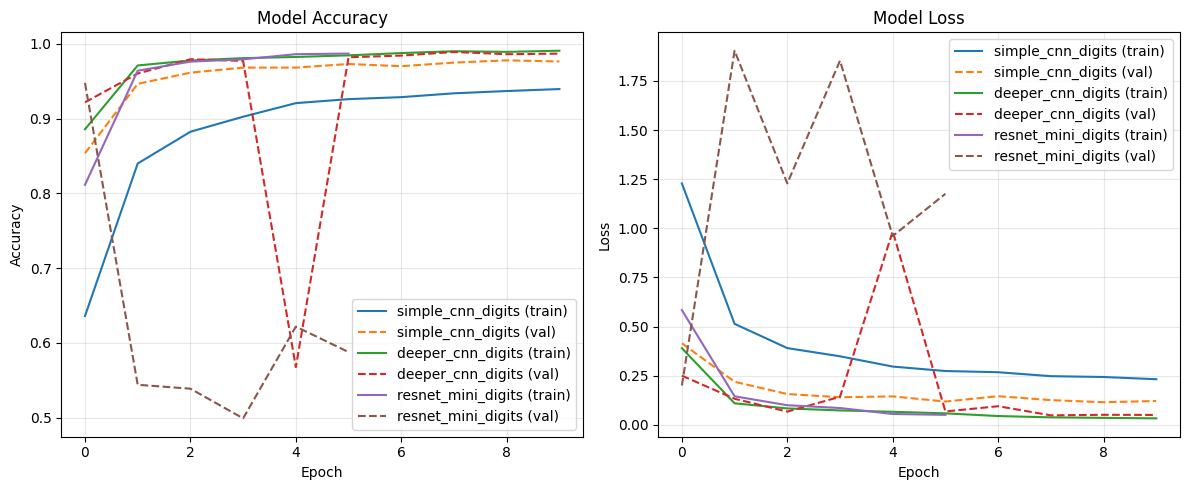

                    Model  Test Accuracy  Test Loss  F1 Score (macro)  \
0  deeper_cell_classifier       0.989338   0.032975          0.987207   
1       deeper_cnn_digits       0.988028   0.042430          0.983108   
2  simple_cell_classifier       0.984474   0.060023          0.981144   
3       simple_cnn_digits       0.979050   0.098198          0.969765   
4      resnet_mini_digits       0.949308   0.202790          0.925902   

   Precision (macro)  Recall (macro)  
0           0.989469        0.985161  
1           0.983915        0.982383  
2           0.986124        0.976933  
3           0.971657        0.968737  
4           0.936103        0.923501  


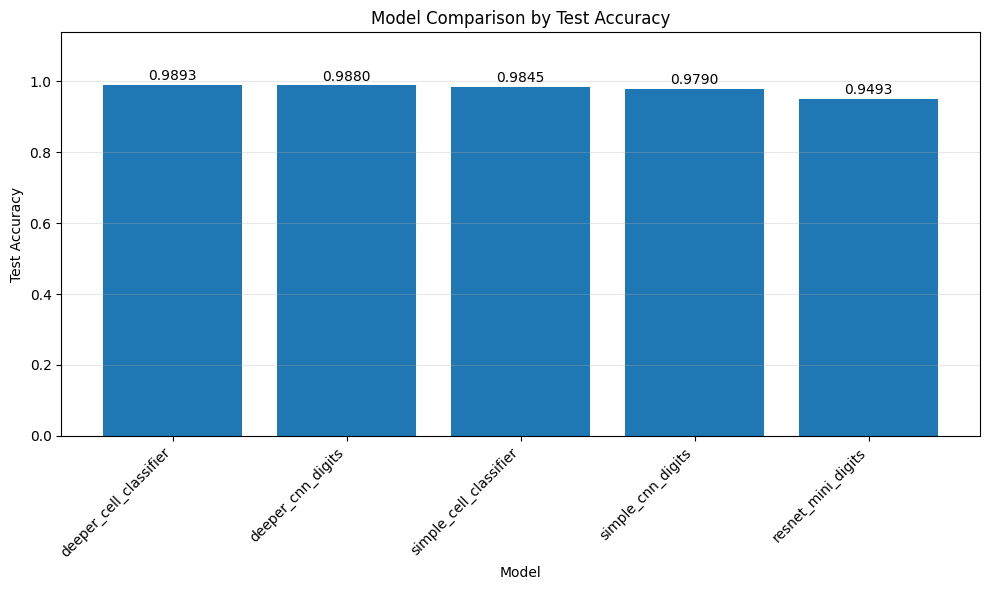

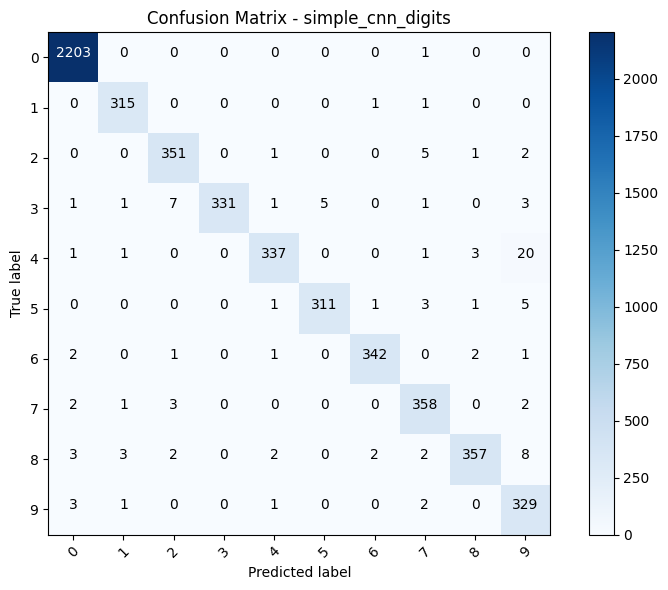

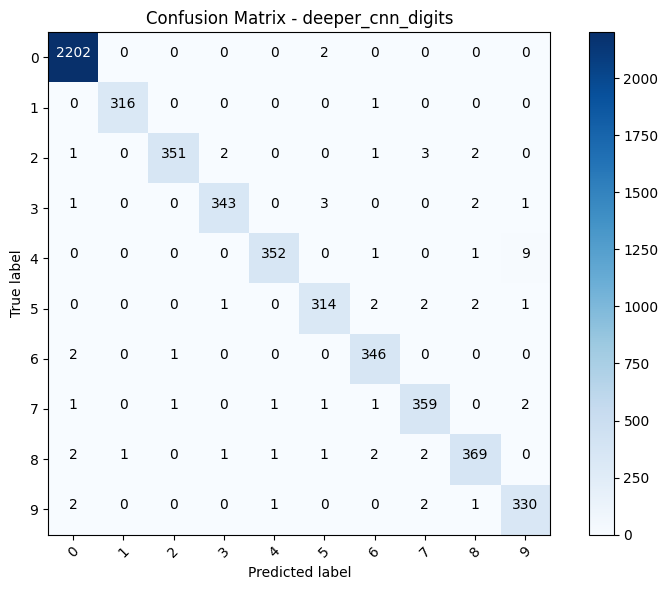

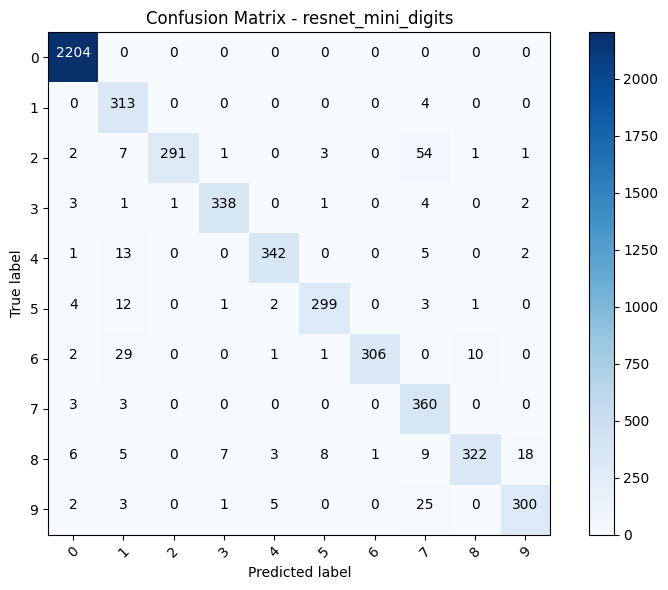

In [26]:
# Evaluate digit recognition models
digit_comparison = experiment.evaluate_digit_models()


Cell Type Classification Model Comparison:


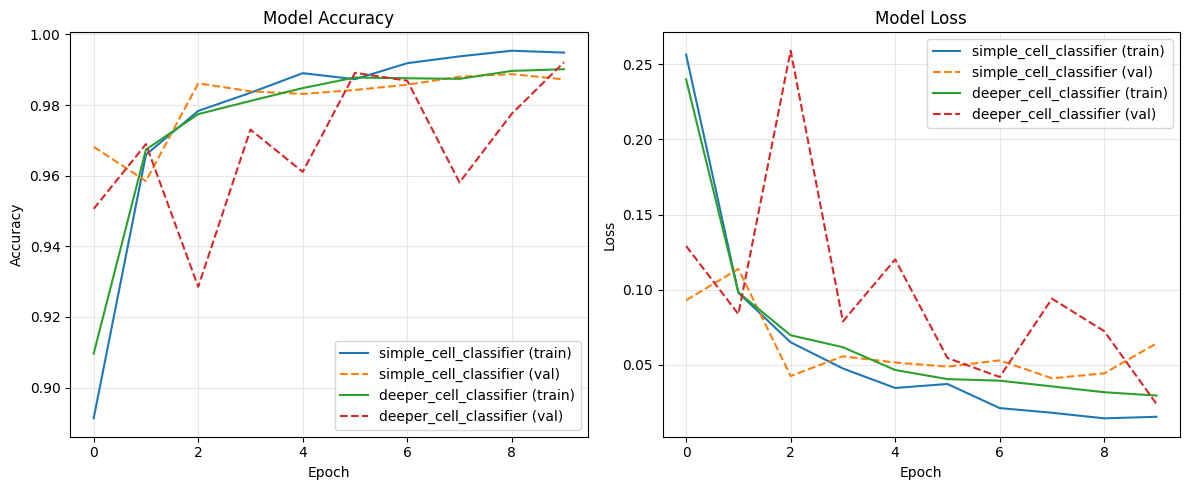

                    Model  Test Accuracy  Test Loss  F1 Score (macro)  \
0  deeper_cell_classifier       0.989338   0.032975          0.987207   
1       deeper_cnn_digits       0.988028   0.042430          0.983108   
2  simple_cell_classifier       0.984474   0.060023          0.981144   
3       simple_cnn_digits       0.979050   0.098198          0.969765   
4      resnet_mini_digits       0.949308   0.202790          0.925902   

   Precision (macro)  Recall (macro)  
0           0.989469        0.985161  
1           0.983915        0.982383  
2           0.986124        0.976933  
3           0.971657        0.968737  
4           0.936103        0.923501  


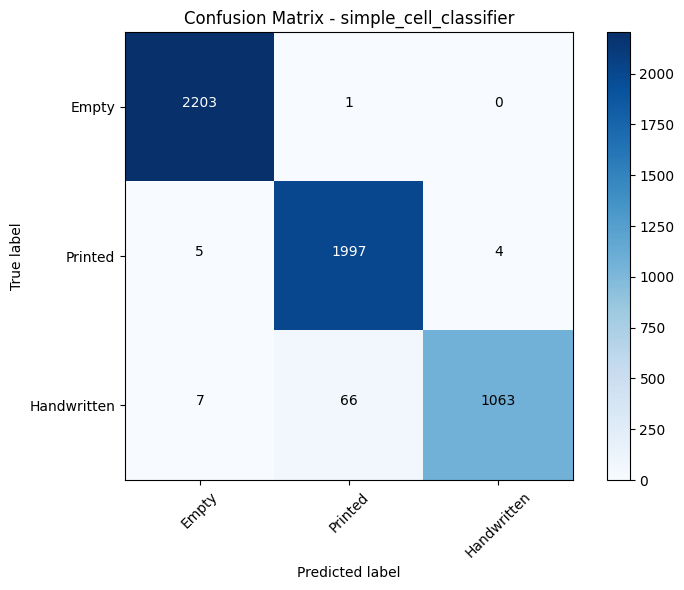

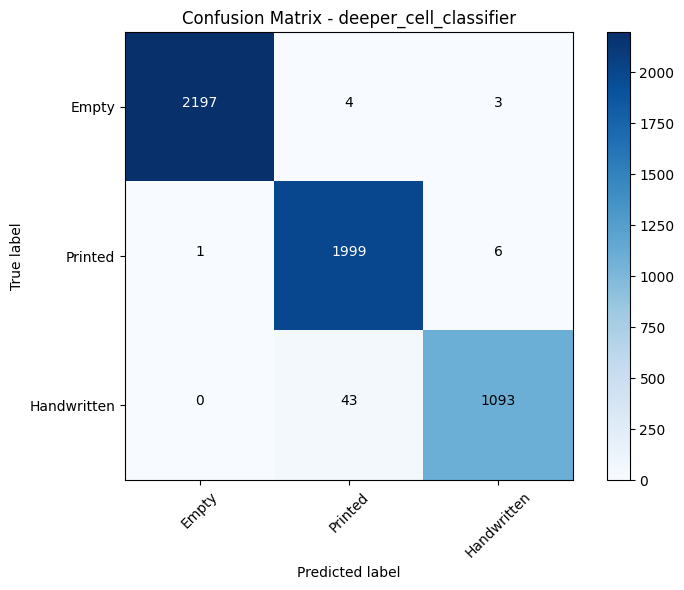

In [27]:
# Evaluate cell type classification models
cell_comparison = experiment.evaluate_cell_type_models()

## Visualize Predictions

Let's look at some of the model predictions.

168/168 [==============================] - 0s 2ms/step


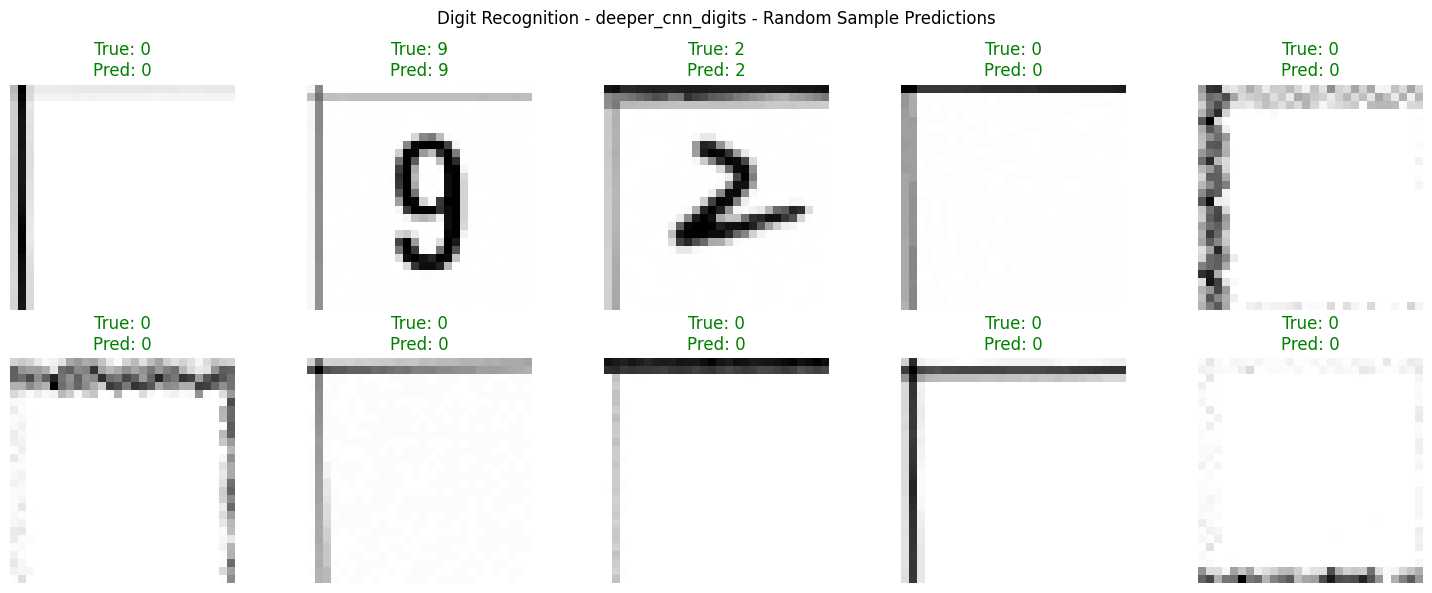

168/168 [==============================] - 0s 3ms/step
Found 64 incorrect predictions out of 5346 examples.


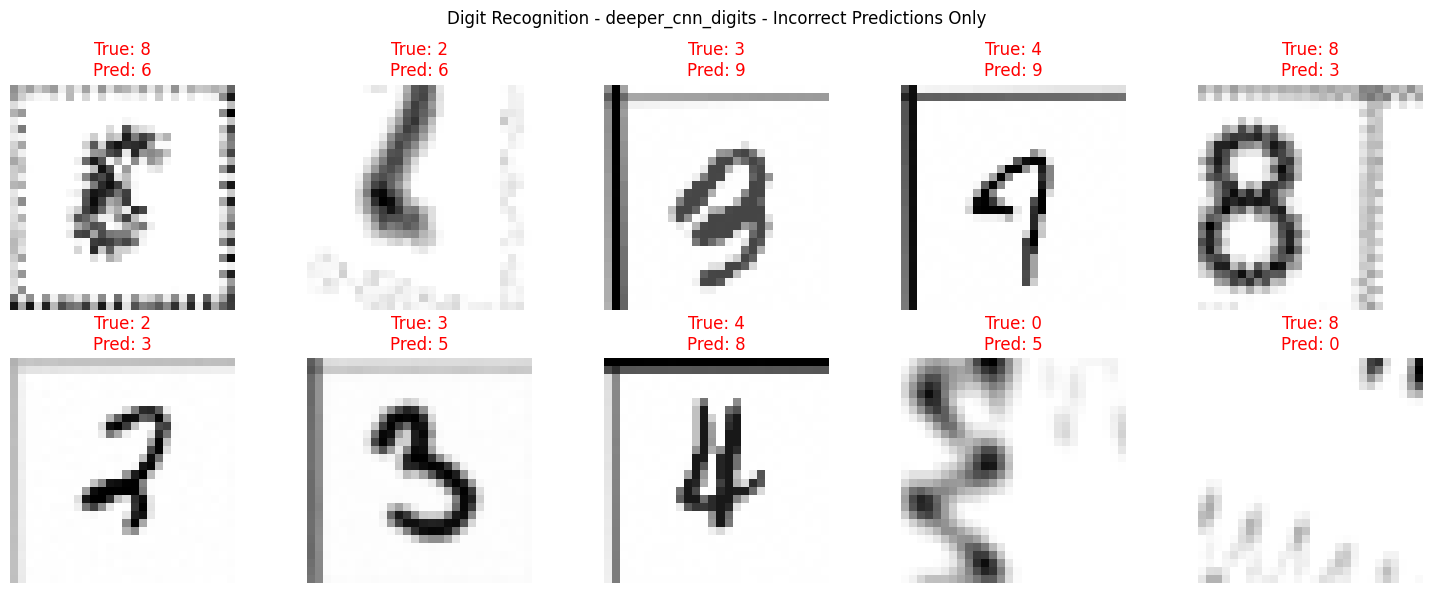

In [45]:
# Get the best digit recognition model (based on previous evaluation)
if 'digit_models' in experiment.results:
    # Find the best model name from evaluation results
    # Only include models with "digits" in the name
    digit_models_only = [name for name in digit_comparison['Model'] if 'digits' in name]
    best_model_name = digit_models_only[0]  # Get the first (best) digit model
    best_digit_model = experiment.model_evaluator.models[best_model_name]
    
    # Get test data
    digit_test_data = experiment.datasets['digit_recognition']['test']

    # After loading the best model and before visualizing
    X_test, y_test = experiment.datasets['digit_recognition']['test']
    y_pred = best_digit_model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    
    # Visualize random predictions
    visualize_predictions(
        best_digit_model,
        digit_test_data,
        class_names=[str(i) for i in range(10)],
        title=f"Digit Recognition - {best_model_name}",
        num_samples=10
    )
    
    # Visualize incorrect predictions
    visualize_predictions(
        best_digit_model,
        digit_test_data,
        class_names=[str(i) for i in range(10)],
        title=f"Digit Recognition - {best_model_name}",
        num_samples=10,
        show_errors_only=True
    )

168/168 [==============================] - 0s 3ms/step


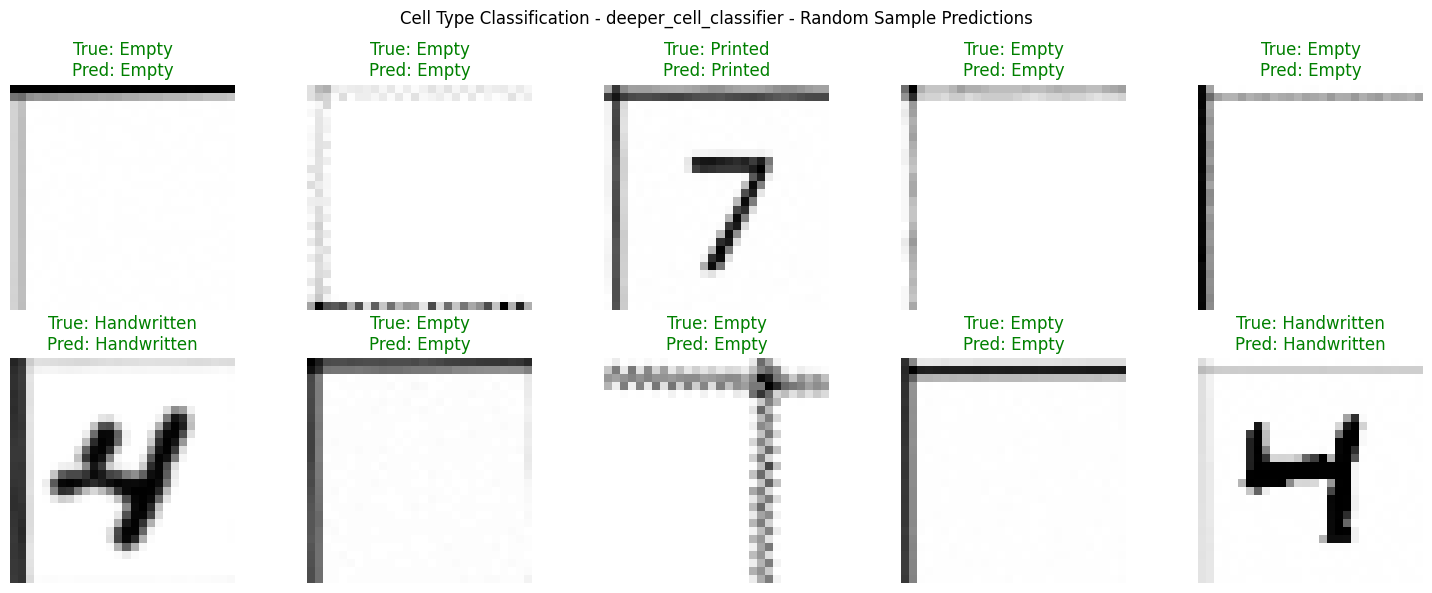

168/168 [==============================] - 0s 3ms/step
Found 57 incorrect predictions out of 5346 examples.


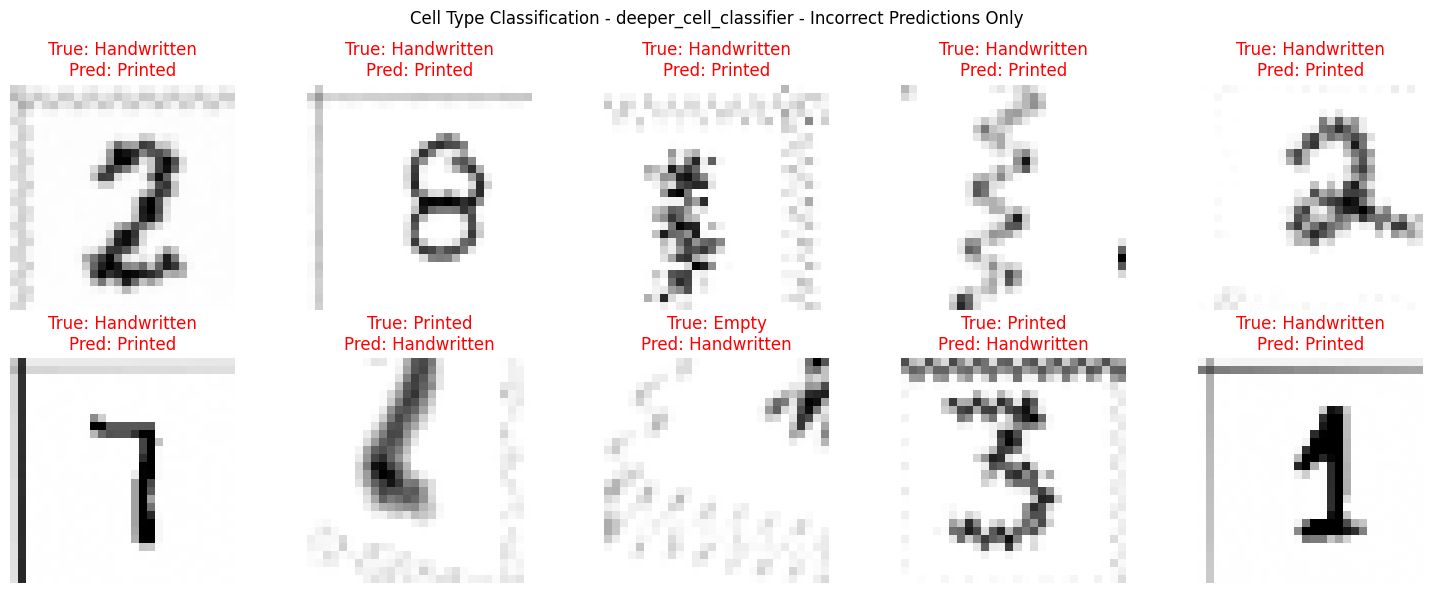

In [41]:
# Get the best cell type classification model
if 'cell_type_models' in experiment.results:
    # Find the best model name from evaluation results
    best_cell_model_name = cell_comparison.iloc[0]['Model']
    best_cell_model = experiment.model_evaluator.models[best_cell_model_name]
    
    # Get test data
    cell_test_data = experiment.datasets['cell_type_classification']['test']
    
    # Visualize random predictions
    visualize_predictions(
        best_cell_model,
        cell_test_data,
        class_names=['Empty', 'Printed', 'Handwritten'],
        title=f"Cell Type Classification - {best_cell_model_name}",
        num_samples=10
    )
    
    # Visualize incorrect predictions
    visualize_predictions(
        best_cell_model,
        cell_test_data,
        class_names=['Empty', 'Printed', 'Handwritten'],
        title=f"Cell Type Classification - {best_cell_model_name}",
        num_samples=10,
        show_errors_only=True
    )

## Save Models

Let's save our best models for future use.

In [42]:
from src.utils import save_model

# Save the best digit recognition model
if 'digit_models' in experiment.results:
    digit_model_path = save_model(best_digit_model, best_model_name)
    print(f"Digit model saved to: {digit_model_path}")
    
    # Save the best cell type classification model
    cell_model_path = save_model(best_cell_model, best_cell_model_name)
    print(f"Cell type model saved to: {cell_model_path}")

Model saved to /Users/matt/development/sudoku-ai/models/deeper_cnn_digits.h5
Digit model saved to: /Users/matt/development/sudoku-ai/models/deeper_cnn_digits.h5
Model saved to /Users/matt/development/sudoku-ai/models/deeper_cell_classifier.h5
Cell type model saved to: /Users/matt/development/sudoku-ai/models/deeper_cell_classifier.h5


/Users/matt/development/sudoku-ai/sudoku-env/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load and Test Saved Models

Let's verify that we can load the saved models and use them for inference.

1/1 [==============================] - 0s 72ms/step


2025-05-14 14:13:38.127580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


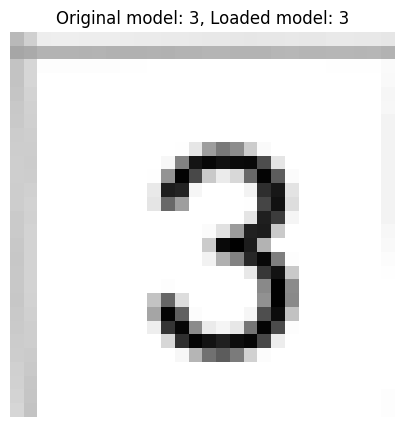

Original model prediction: 3
Loaded model prediction: 3
Predictions match: True


In [43]:
from src.utils import load_model

# Load the saved models
loaded_digit_model = load_model(best_model_name)
loaded_cell_model = load_model(best_cell_model_name)

# Verify that the loaded models work
# Get a single test sample
x_test, y_test = digit_test_data
x_sample = x_test[0:1]  # Get just one sample

# Make predictions with both original and loaded models
original_pred = np.argmax(best_digit_model.predict(x_sample), axis=1)[0]
loaded_pred = np.argmax(loaded_digit_model.predict(x_sample), axis=1)[0]

# Display the results
plt.figure(figsize=(5, 5))
plt.imshow(x_sample[0, :, :, 0], cmap='gray')
plt.title(f"Original model: {original_pred}, Loaded model: {loaded_pred}")
plt.axis('off')
plt.show()

print(f"Original model prediction: {original_pred}")
print(f"Loaded model prediction: {loaded_pred}")
print(f"Predictions match: {original_pred == loaded_pred}")

## Conclusion

In this notebook, we've demonstrated the process of:
1. Loading and preparing Sudoku image data
2. Training digit recognition and cell type classification models
3. Evaluating and comparing model performance
4. Saving and loading models for reuse

These models can now be incorporated into a complete Sudoku solver pipeline that takes an image of a Sudoku puzzle, detects the board, extracts the cells, recognizes the digits, and solves the puzzle.